In [459]:
import numpy as np
from scipy.optimize import brentq
from scipy.optimize import bisect
from scipy.interpolate import Rbf
from numba import jit
import matplotlib.pyplot as plt

In [460]:
th=2.5
d=0.7
tol=1.0*(10**-8)

In [461]:
tol


1e-08

In [462]:

def h(n,r):
    def h_implicit(h):
        return ( h + n * (1/r))+(h+r*n)-2*(h+r*n)* ( h + n * (1/r)) 
    return brentq(h_implicit,0.0 ,1.0)


In [463]:

def system(n_1t_init, n_2t_init,r):
    
    
    n_1t=n_1t_init
    
    n_2t=n_2t_init
    
    h1=h(n_1t,r)
    h2=h(n_2t,r)
   
    
    if n_1t <=1/2 and n_2t <= 1/2:
        n_1t_new= d * (th/2 + (1-th)*n_1t)
        n_2t_new= d * (th/2 + (1-th)*n_2t)
    
        
    elif n_1t>=h2 and n_2t>=h1:
        n_1t_new = d *n_1t
        n_2t_new = d* n_2t
            
        
    elif n_1t >=1/2 and n_2t <=h1:
        n_1t_new=d*n_1t
        n_2t_new=d*(th*h1 + (1-th)* n_2t)
        
    elif n_1t<=h2 and n_2t>=1/2:
        n_1t_new= d*(th*h2 + (1-th)* n_1t)
        n_2t_new=d*n_2t
            
    return n_1t_new, n_2t_new

In [464]:

def test():
    
    r=0.2
    n1=0.2
    n2=0.6
    
    for i in range(0,3):
        n1, n2=system(n1, n2,r)
        print(n1, n2)
        
    return n1, n2

    

In [465]:

def plot_series(n1,n2,r):
    
    
    periods=30
  
    n1_values=np.empty([periods,1])
    n2_values=np.empty([periods,1])
    n1_values[0]=n1
    n2_values[0]=n2
    
    for i in range (1,periods):
        n1_values[i], n2_values[i]=system(n1_values[i-1], n2_values[i-1], r)
    plt.plot(n1_values, label='$n_1$')
    plt.plot(n2_values, label='$n_2$')
    plt.xlabel('time', fontsize=15)
    plt.title(r'Series with $\rho=0.6$', fontsize=18)
    plt.legend()
    plt.show()
    return None
    

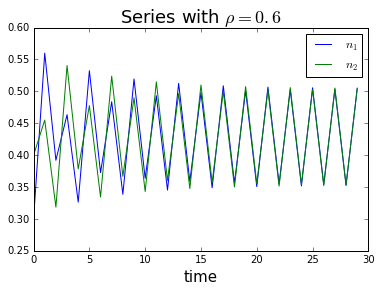

In [466]:
%matplotlib inline
plot_series(0.3,0.4, 0.6)

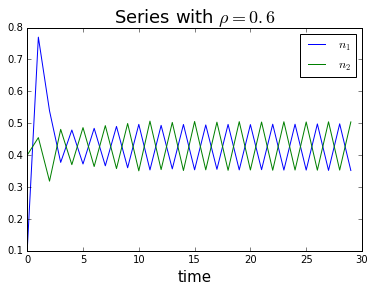

In [467]:
%matplotlib inline
plot_series(0.1,0.4, 0.6)

In [468]:

def norm(x1,y1,x2,y2):
    
    x_diff=abs(x1-y1)
    
    y_diff=abs(x2-y2)
    
    return max(x_diff, y_diff)

In [469]:

def synch(n1_init,n2_init,r):
    
    max_inter=150
   
    n1_t0=n1_init
    
    n2_t0=n2_init
    
    for i in range (0,max_inter):
        
        n1_t1, n2_t1 = system(n1_t0, n2_t0, r)
        
        n1_t2, n2_t2 = system(n1_t1, n2_t1, r)
        
        if i >0 and norm(n1_t0, n2_t0,n1_t2, n2_t2 ) <= tol:
            
            return 1
            break
    
        
        elif i ==max_inter-1:
            return 0
    
        else: 
            n1_t0=n1_t1
            
            n2_t0=n2_t1
            
            
    
    
    
    
    
  

In [514]:
@jit
def plot_data(r):
    
    N=50
    
    coord=np.linspace(0.0,1.0, N)
    
    n1=np.linspace(0.0,1.0, N)
    n2=np.linspace(0.0,1.0, N)
    
    is_synch=np.empty((N,N))
    for i in range(N):
        
        for j in range (N):
            is_synch[i,j]=synch(n1[i],n2[j], r)
   
    return n1, n2, is_synch
    
    
    
  

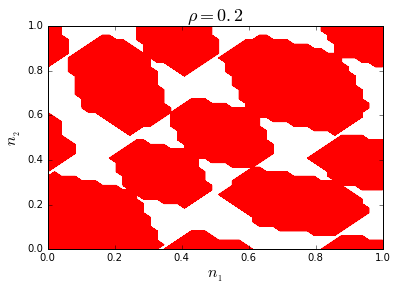

In [515]:
n1, n2, is_synch=plot_data(0.2)
levels=[0.001, 1.0]
Plot=plt.contour(n1,n2, is_synch, levels , colors='r')
Plot=plt.contourf(n1, n2, is_synch, levels,colors=('r','w'))
plt.title(r'$\rho=0.2$', fontsize=18)
plt.xlabel('$n_{_1}$', fontsize=16)
plt.ylabel('$n_{_2}$', fontsize=16)
plt.show()


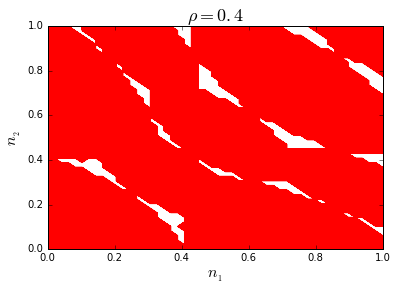

In [516]:
n1, n2, is_synch=plot_data(0.4)
levels=[0.001, 1.0]
Plot=plt.contour(n1,n2, is_synch, levels , colors='r')
Plot=plt.contourf(n1, n2, is_synch, levels,colors=('r','w'))
plt.title(r'$\rho=0.4$', fontsize=18)
plt.xlabel('$n_{_1}$', fontsize=16)
plt.ylabel('$n_{_2}$', fontsize=16)
plt.show()


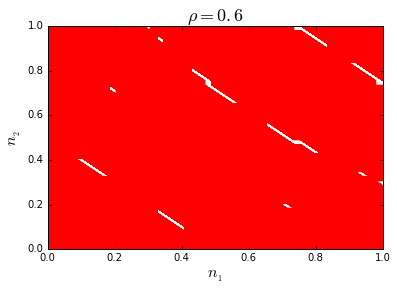

In [517]:
n1, n2, is_synch=plot_data(0.6)
levels=[0.001, 1.0]
Plot=plt.contour(n1,n2, is_synch, levels , colors='r')
Plot=plt.contourf(n1, n2, is_synch, levels,colors=('r','w'))
plt.title(r'$\rho=0.6$', fontsize=18)
plt.xlabel('$n_{_1}$', fontsize=16)
plt.ylabel('$n_{_2}$', fontsize=16)
plt.show()

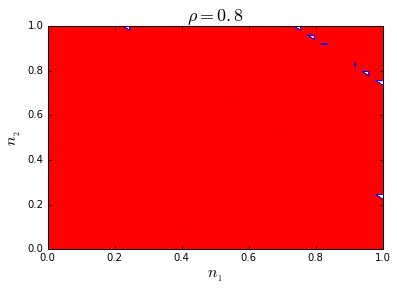

In [519]:
n1, n2, is_synch=plot_data(0.8)
levels=[0.001, 1.0]
Plot=plt.contour(n1,n2, is_synch, levels , colors='b')
Plot=plt.contourf(n1, n2, is_synch, levels,colors=('r','w'))
plt.title(r'$\rho=0.8$', fontsize=18)
plt.xlabel('$n_{_1}$', fontsize=16)
plt.ylabel('$n_{_2}$', fontsize=16)
plt.show()